In [18]:
# import stuff
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, confusion_matrix

In [19]:
# load data
df = pd.read_csv("ai4i2020.csv")
tempDiff = (df["Process temperature [K]"] - df["Air temperature [K]"]).round(1)
df["Temperature Difference [K]"] = tempDiff
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature Difference [K]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7


In [20]:
# Split data
X = df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Type", "Temperature Difference [K]"]]
y = df[["Machine failure"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [21]:
# Preprocessing
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                    'Torque [Nm]', 'Tool wear [min]', 'Temperature Difference [K]']
categorical_features = ['Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [22]:
# Pipeline
clf = Pipeline(steps=[
    ('preproc', preprocessor),
    ('gb', GradientBoostingClassifier())
])

In [23]:
# Train
clf.fit(X_train, y_train)

/home/victus/hackathons/DataJam_MachineFailure/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,steps,"[('preproc', ...), ('gb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
# Predict / Evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2898
           1       0.86      0.75      0.80       102

    accuracy                           0.99      3000
   macro avg       0.92      0.88      0.90      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 0.9752550778765612


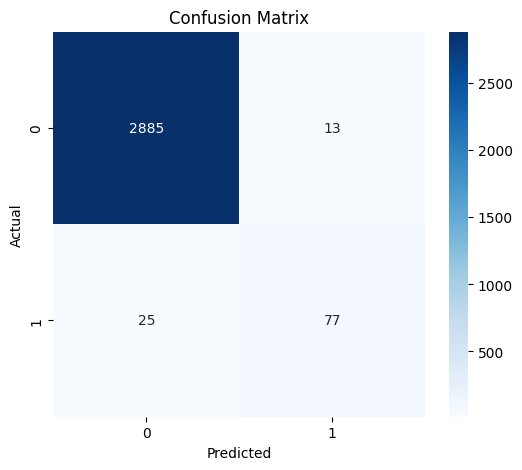

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

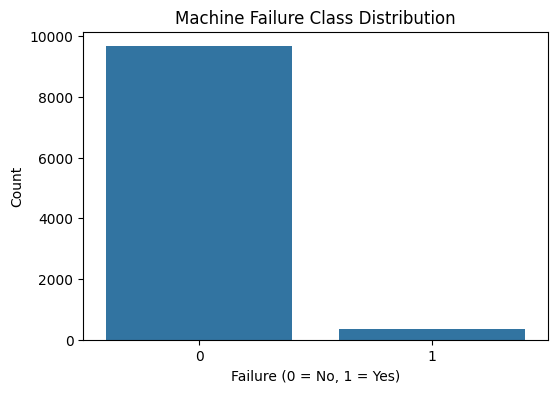

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Machine failure"])
plt.title("Machine Failure Class Distribution")
plt.xlabel("Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

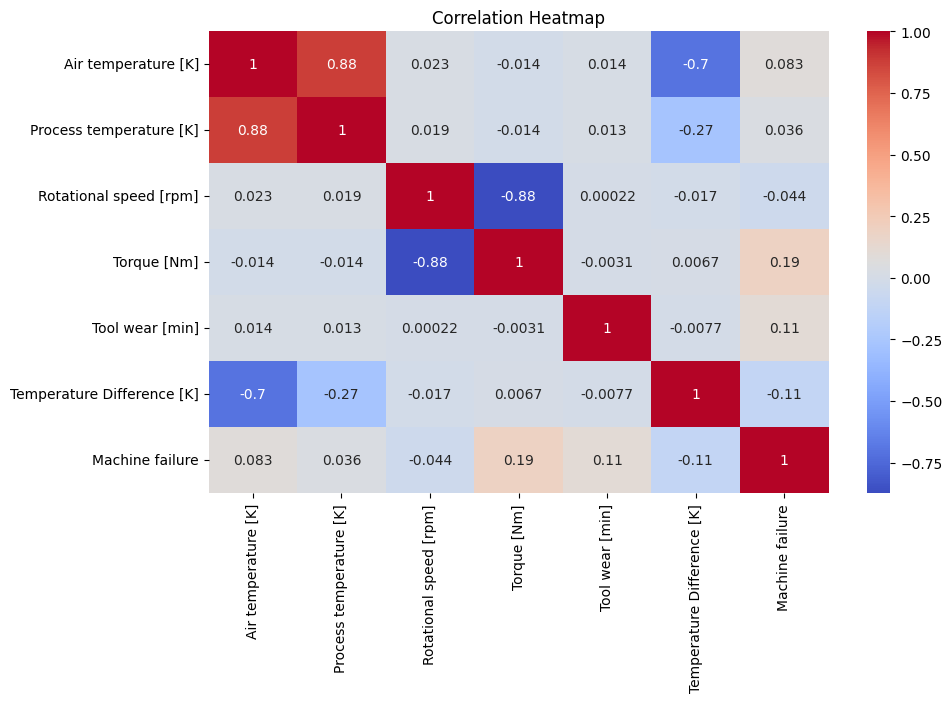

In [28]:
plt.figure(figsize=(10,6))
corr = df[numeric_features + ["Machine failure"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 600x500 with 0 Axes>

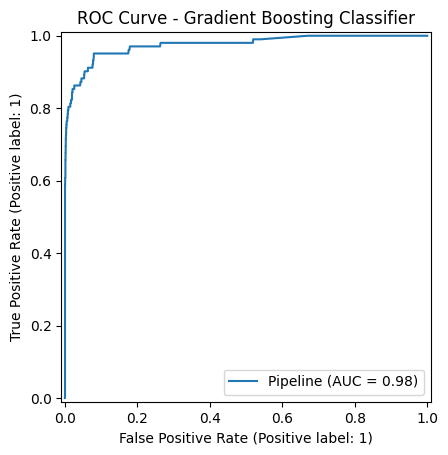

In [30]:
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.show()

In [26]:
# Save modle
joblib.dump(clf, "machine_failure_model.pkl")

['machine_failure_model.pkl']